# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ananta Alfallah Tarigan
- Email: anantar437471@gmail.com
- Id Dicoding: ananta_alfallah

## Menentukan Pertanyaan Bisnis

- Kapan musim dengan jumlah penyewaan sepeda tertinggi?
- Bagaimana faktor lingkungan yang mempengaruhi jumlah penyewaan sepeda bulanan?
- Bagaimana pengkategorian jumlah penyewaan sepeda bulanan akibat pengaruh faktor lingkungan?
- Bagaimana perbandingan jumlah penyewaan musiman sepeda di hari kerja dan hari libur untuk kedua jenis user?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.cluster import KMeans
import scipy.stats as stats
import copy
sns.set(style='dark')

## Data Wrangling

### Gathering Data

Mengumpulkan data yang dibutuhkan, serta melihat isi data teratas

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai kualitas dari data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut. Seperti tipe kolom, adanya kosong/NA/Null, adanya duplikat, dll

In [3]:
day_df.info() #kolom dteday masih bertipe object, nilai di semua kolom sama, dan tiap kolom tidak mempunyai null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mencoba mengetahui jumlah Na dan jumlah duplikat dalam data

In [4]:
print('Jumlah na: ', day_df.isna().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah na:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi:  0


Melihat nilai statistik dalam data, untuk menemukan kejanggalan seperti, nili max/min yang terlalu tinggi/rendah (pencilan)

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#Membersihkan data tersebut sehingga siap untuk dianalisis. #dteday masih dlm type object, dan menghilangkan beberapa kolom yang kurang relevan

In [6]:
tipe_tanggal = ['dteday']
for i in tipe_tanggal:
    day_df[i] = pd.to_datetime(day_df[i])
day_df.drop(columns=['instant','yr','holiday','weathersit'],axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
day_df.describe(include="all") #angka-angka statistik di seluruh kolom terlihat wajar

,dteday,season,mnth,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,6.519836,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,4.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,7.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,10.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,12.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,3.451913,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Mencoba melakukan pengelompokan dengan groupby, berdasarkan musimnya untuk mendapat informasi

In [8]:
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean",'sum'],
    "registered": ["max", "min", "mean",'sum'], 'cnt':["max", "min", "mean",'sum']
})

#Mencoba mengetahui nilai penyewaan di ke empat musim, baik untuk casual maupun registered user

casual                           registered                            \
          max  min         mean     sum        max  min         mean     sum   
season                                                                         
1        3155    9   334.928177   60622       5315  416  2269.204420  410726   
2        3410  120  1106.097826  203522       6456  674  3886.233696  715067   
3        3160  118  1202.611702  226091       6917  889  4441.691489  835038   
4        3031    2   729.112360  129782       6946   20  3999.050562  711831   

         cnt                              
         max   min         mean      sum  
season                                    
1       7836   431  2604.132597   471348  
2       8362   795  4992.331522   918589  
3       8714  1115  5644.303191  1061129  
4       8555    22  4728.162921   841613

In [9]:
day_df.groupby(by=["season",'workingday']).agg({
    "casual": 'sum',
    "registered": 'sum', 'cnt':'sum'
})
#Mencoba mengetahui nilai penyewaan di ke empat musim untuk hari kerja dan hari libur (termasuk weekend), baik untuk casual maupun registered user

casual  registered     cnt
season workingday                            
1      0            32400      105283  137683
       1            28222      305443  333665
2      0           105693      182283  287976
       1            97829      532784  630613
3      0           107345      204711  312056
       1           118746      630327  749073
4      0            71294      191260  262554
       1            58488      520571  579059

Mencoba mengkorelasikan berbagai nilai di tiap-tiap kolom

In [10]:
day_df[['temp', 'atemp','hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(numeric_only=True)
#casual dan registered memiliki korelasi sekitar 0.4, sehingga kenaikan salah satunya belum tentu kenaikan yang lainnya

#Komponen iklim/lingkungan rataan atemp memiliki korelasi cukup tinggi, sebesar 0.6 dengan jumlah total cnt

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


Mencoba mengelompokan data berdasarkan musim, untuk mengetahui nilai feeling temprature

In [11]:
day_df.groupby(by="season").agg({ 'cnt':'sum','atemp': 'mean'})
#kenaikan rataan feeling tempratur terlihat bersesuaian dengan kenaikan jumlah penyewaan sepeda

,cnt,atemp
season,,
1,471348,0.296914
2,918589,0.520307
3,1061129,0.655898
4,841613,0.415539


Mencoba mengetahui jumlah penyewaan sepeda bulanan dan hubungannya dengan feeling temprature rataan bulan tersebut

In [12]:
day_df.groupby(by="mnth").agg({ 'cnt':'sum','atemp': 'mean'})
#kenaikan feeling tempratur juga terlihat bersesuaian dengan kenaikan jumlah penyewaan sepeda bulanan

,cnt,atemp
mnth,,
1,134933,0.239796
2,151352,0.299731
3,228920,0.381954
4,269094,0.457081
5,331686,0.565662
6,346342,0.638246
7,344948,0.704094
8,351194,0.651475
9,345991,0.579299


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Melakukan visualisasi jumlah total penyewaan sepeda untuk tiap musimnya

C:\Users\kocak\AppData\Local\Temp\ipykernel_19656\3535813357.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


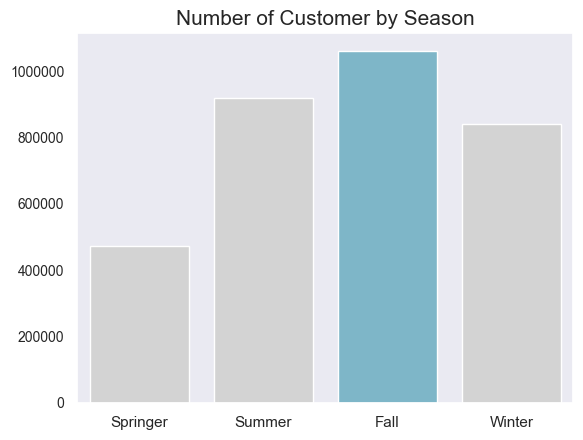

In [13]:
seasonal_orders_df = day_df.groupby(by='season').agg({'cnt':'sum','atemp':'mean'}).reset_index()

seasonal_orders_df.rename(columns={"cnt": "rent_count",'atemp':'feeling temperature'}, inplace=True)

def num_to_season(x):
    if x == 1:
        return "Springer"
    elif x == 2:
        return "Summer"
    elif x == 3:
        return "Fall"
    elif x == 4:
        return "Winter"
seasonal_orders_df['season'] = seasonal_orders_df['season'].apply(num_to_season)

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    x="season", 
    y="rent_count",
    data=seasonal_orders_df,
    palette=colors,

)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()





Melakukan visualisasi rataan feeling temprature untuk tiap musimnya, sehingga bisa mengetahui kecocokannya dengan visualisasi jumlah penyewa total

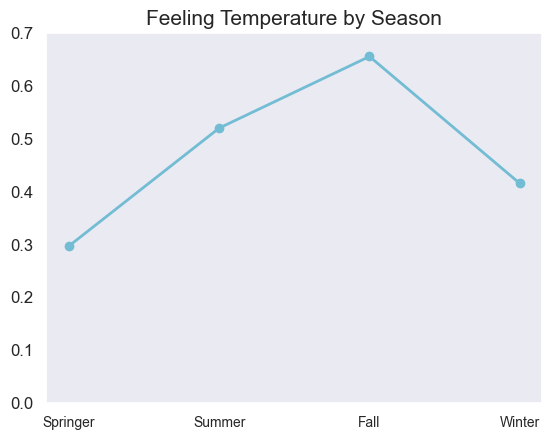

In [14]:
plt.plot(
    seasonal_orders_df["season"],
    seasonal_orders_df["feeling temperature"],
    marker='o', 
    linewidth=2,
    color="#72BCD4",
)
plt.title("Feeling Temperature by Season", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0, 0.7)

plt.show()
#Dari visualisasi ini dapat dilihat bahwa faktor lingkungan, feeling temprature, sangat bersesuaian dengan jumlah total penyewa di tiap musimnya

### Pertanyaan 2: 

Melakukan visualisasi jumlah penyewaan sepeda total bulanan

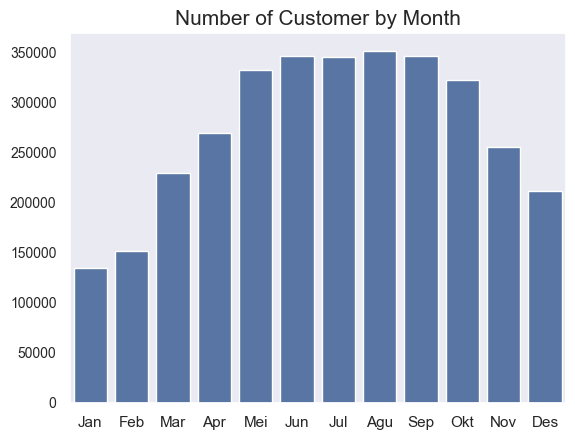

In [15]:
monthly_orders_df = day_df.groupby(by='mnth').agg({'cnt':'sum','atemp':'mean'}).reset_index()

monthly_orders_df.rename(columns={"cnt": "rent_count",'atemp':'feeling_temperature'}, inplace=True)

def num_to_month(x):
    if x == 1:
        return "Jan"
    elif x == 2:
        return "Feb"
    elif x == 3:
        return "Mar"
    elif x == 4:
        return "Apr"
    elif x == 5:
        return "Mei"
    elif x == 6:
        return "Jun"
    elif x == 7:
        return "Jul"
    elif x == 8:
        return "Agu"
    elif x == 9:
        return "Sep"
    elif x == 10:
        return "Okt"
    elif x == 11:
        return "Nov"
    elif x == 12:
        return "Des"
monthly_orders_df['mnth'] = monthly_orders_df['mnth'].apply(num_to_month)

sns.barplot(
    x="mnth", 
    y="rent_count",
    data=monthly_orders_df,

)
plt.title("Number of Customer by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Melakukan visualisasi rataan feeling temprature di tiap bulannya, untuk mencocokan kembali dengan jumlah total bulanan

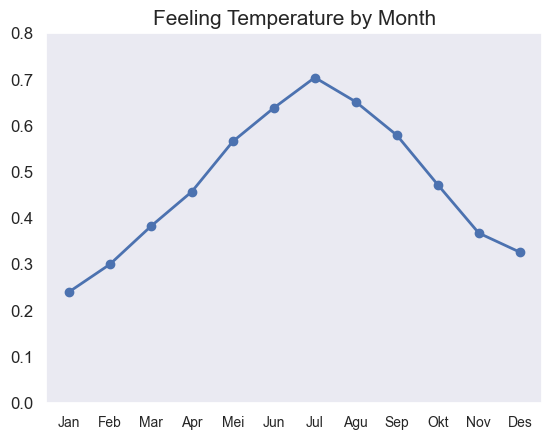

In [16]:
plt.plot(
    monthly_orders_df["mnth"],
    monthly_orders_df["feeling_temperature"],
    marker='o', 
    linewidth=2,
)
plt.title("Feeling Temperature by Month", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0, 0.8)

plt.show()

#Dari visualisasi ini dapat dilihat kembali bahwa faktor lingkungan, rataan feeling temprature, cukup bersesuaian dengan jumlah total penyewa sepeda

Membuat visualisasi dari hubungan antara rataan feeling temprature dan jumlah penyewaan sepeda bulanan

Persamaan Regressi:  y = 481205.79x + 46505.74
Nilai R-Square:  0.8810012344538424


Text(0.5, 1.0, 'Feeling Temprature vs. Rent Count Monthly')

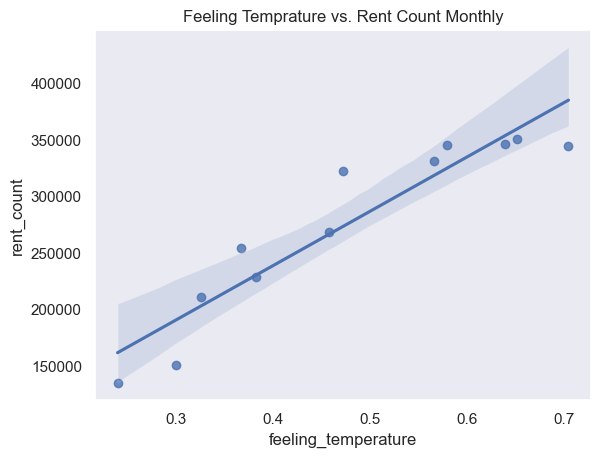

In [17]:

slope, intercept, r_value, p_value, std_err = stats.linregress(monthly_orders_df['feeling_temperature'], monthly_orders_df['rent_count'])

equation = f'y = {slope:.2f}x + {intercept:.2f}'
print('Persamaan Regressi: ', equation)

r_squared = r_value**2
print('Nilai R-Square: ',r_squared)

sns.regplot(x='feeling_temperature', y='rent_count', data=monthly_orders_df)
plt.title('Feeling Temprature vs. Rent Count Monthly')

# Dari visualisasi ini, diketahui bahwa nilai R-Square yang cukup tinggi di angka 0.88, sehingga model ini cukup cocok menangkap hubungan antar variabel
# Serta menunjukan bahwa sebagian besar variasi variabel terikat (rent_count) dapat diprediksi oleh variabel bebas (feeling temprature)
# Dapat disimpulkan bahwa semakin rendah feeling temprature maka jumlah penjualan bulanan akan semakin rendah pula


### Pertanyaan 3: 

Clustering menggunakan K-Means

Setelah mengetahui bahwa feeling temprature bulanan dapat memprediksi jumlah penyewa bulanan, maka selanjutnya kita akan mengelompokannya menjadi 3 kategori menggunakan algoritma K-Means

In [18]:
monthly_orders_df2 = day_df.groupby(by='mnth').agg({'cnt':'sum','atemp':'mean'}).reset_index()  #mengembalikan format bulan ke angka (seperti awal)
monthly_orders_df2.rename(columns={"cnt": "rent_count",'atemp':'feeling_temperature'}, inplace=True)

X= copy.copy(monthly_orders_df2)

kmeans = KMeans(n_clusters=3,random_state=1)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X['Cluster'].replace([2], 'Low', inplace=True)
X['Cluster'].replace([1], 'Mid', inplace=True)
X['Cluster'].replace([0], 'High', inplace=True)

C:\Users\kocak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Melakukan visualisasi scatter plot berdasarkan pengkategorian yang telah dibuat dengan algoritma K-Means

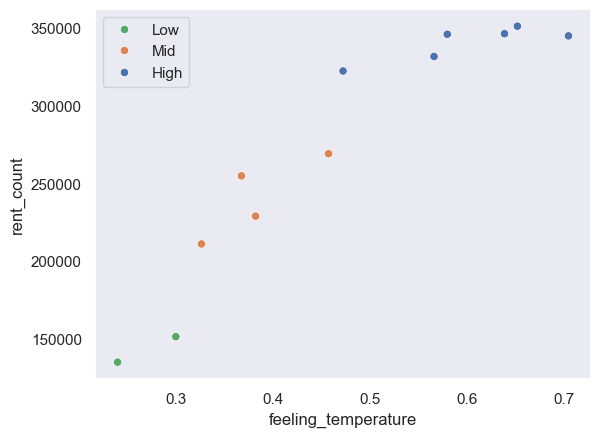

In [19]:
g = sns.scatterplot(data=X, 
                x="feeling_temperature", 
                y="rent_count", 
                hue="Cluster",  
                )

handler, label = g.get_legend_handles_labels()
label[0], label[2] = label[2], label[0]
handler[0], handler[2] = handler[2], handler[0]
g.legend(handler, label)
#Dari sini kita dapat melihat bagaimana kategori jumlah penjualan berdasarkan rataan feeling tempraturen di tiap bulan

### Pertanyaan 4: 

Selanjutnya akan melakukan visualisasi untuk perbandingan antara hari kerja dan non-kerja (mencakup hari libur dan weekend)

In [20]:
day_df2 = copy.copy(day_df)

Mengelompokan jumlah casual dan registered user berdasarkan musim dan kategori working day (0: hari libur, 1: hari kerja)

In [21]:
seasonal_df = day_df2.groupby(by=['season','workingday']).agg({'casual':'sum','registered':'sum','cnt':'sum'})
seasonal_df.rename(columns={"cnt": "Rent_Total",'casual':'Casual_Users','registered':'Registered_Users'}, inplace=True)

work_day_df = seasonal_df.drop(index=0, level=1).reset_index() #menghilangkan hari libur dari index df level 1
no_work_day_df = seasonal_df.drop(index=1, level=1).reset_index() #menghilangkan hari kerja dari index df level 1

Memvisualisasikan jumlah penyewaan sepeda musiman untuk casual users dan registered users

<function matplotlib.pyplot.show(close=None, block=None)>

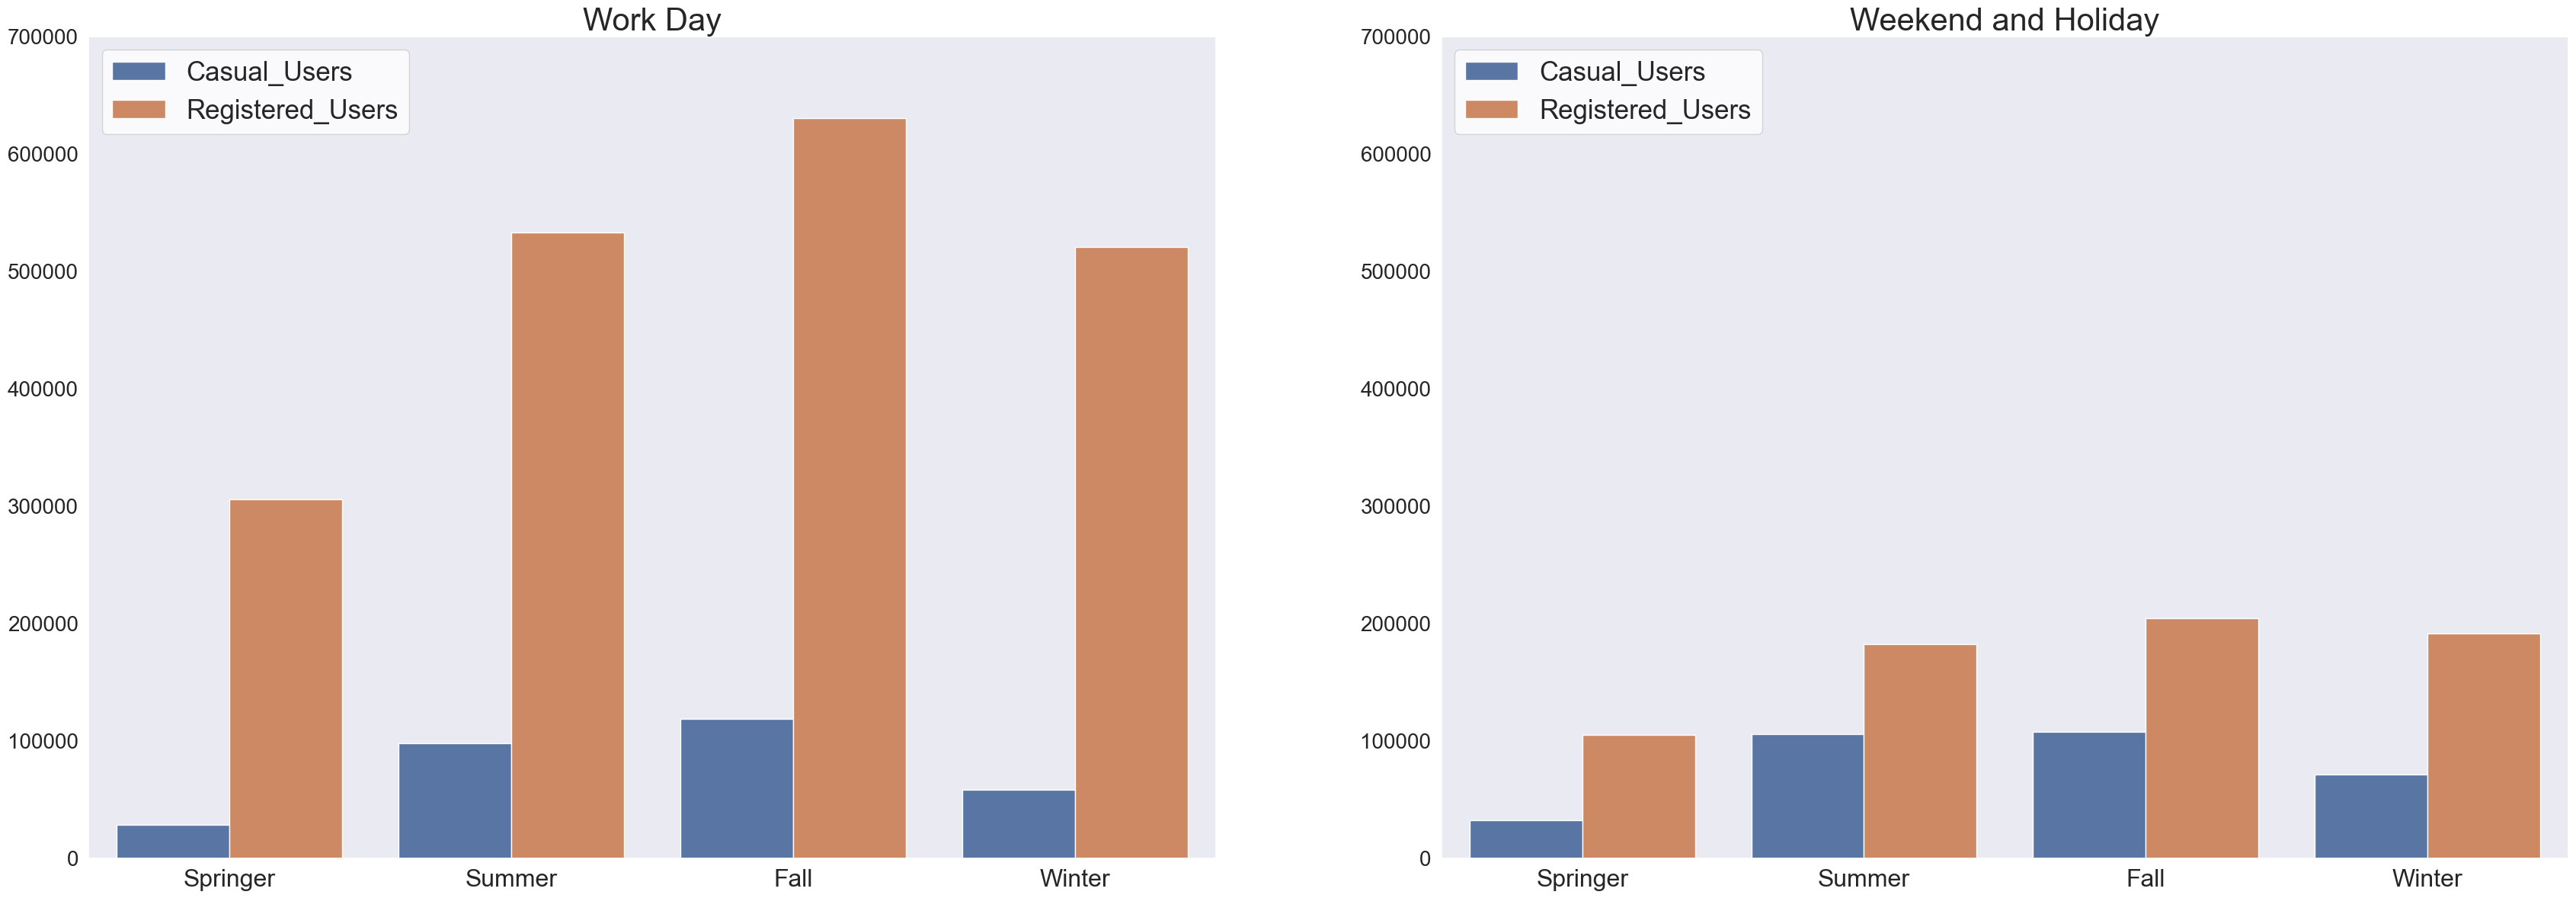

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(42, 14))

sns.set(style="whitegrid")

xs = ["Springer", "Springer", "Summer", "Summer", "Fall", "Fall", "Winter", "Winter"]
hue = ["Casual_Users", "Registered_Users"] * 4

def casual_registered_num(x):
    list_ys=[]
    for i in range(len(x)):
        a = x.iloc[i]['Casual_Users']
        b = x.iloc[i]['Registered_Users']
        list_ys.append(a)
        list_ys.append(b)
    return list_ys

ys_1 = casual_registered_num(work_day_df)
ys_2 = casual_registered_num(no_work_day_df)

sns.barplot(x=xs, y=ys_1, hue=hue, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Work Day", loc="center", fontsize=30)
ax[0].tick_params(axis ='y', labelsize=20)
ax[0].tick_params(axis ='x', labelsize=23)
ax[0].set_ylim(0, 700000)
ax[0].legend(loc='upper left',fontsize=25,)

sns.barplot(x=xs, y=ys_2, hue=hue, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Weekend and Holiday", loc="center", fontsize=30)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis ='x', labelsize=23)
ax[1].set_ylim(0, 700000)
ax[1].legend(loc='upper left',fontsize=25,)

plt.show


Selanjutnya melakukan visualisasi untuk membandingkan banyaknya penyewa sepeda antara casual users dan registered users

<function matplotlib.pyplot.show(close=None, block=None)>

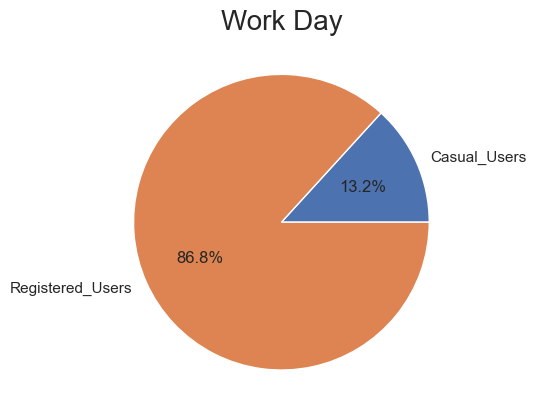

In [23]:
category = ("Casual_Users", "Registered_Users")

total_casual_no_work = no_work_day_df.Casual_Users.sum()
total_registered_no_work = no_work_day_df.Registered_Users.sum()
jumlah_no_work = (total_casual_no_work, total_registered_no_work)

total_casual_work = work_day_df.Casual_Users.sum()
total_registered_work = work_day_df.Registered_Users.sum()
jumlah_work = (total_casual_work, total_registered_work)

plt.pie(x=jumlah_work,labels=category,autopct='%1.1f%%')
plt.title("Work Day", loc="center", fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

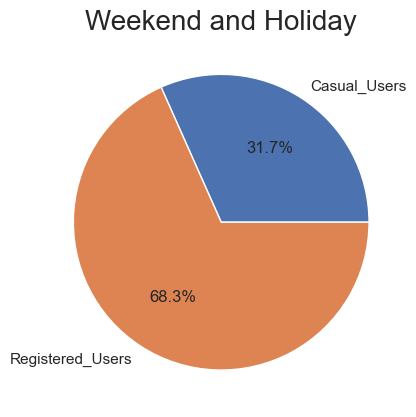

In [24]:
plt.pie(x=jumlah_no_work,labels=category,autopct='%1.1f%%')
plt.title("Weekend and Holiday", loc="center", fontsize=20)

plt.show

## Conclusion

- Conclusion pertanyaan 1:
Musim penyewaan sepeda tertinggi secara keseluruhan berada pada musim summer, dimana pada musim tersebut juga merupakan musim dengan feeling temprature rataan tertinggi

- Conclusion pertanyaan 2:
Faktor lingkungan mempengaruhi jumlah penyewaan sepeda bulanan lewat pengaruh feeling tempraturenya, diamana dengan kenaikan feeling temprature membuat penyewaan sepeda akan meningkat, begitupun sebaliknya.

- Conclusion pertanyaan 3:
Pengkategorian jumlah penyewaan bulanan akibat pengaruh faktor lingkungan (feeling temprature), menghasilkan bulan berkategori penyewaan rendah di awal tahun (Jun, Feb), Bulan berkategori penyewaan sedang di awal-tengah tahun dan akhir tahun (Mar, Apr, Nov, Des), serta bulan berkategori penyewaan tinggi di pertengahan tahun (Mei, Jun, Jul, Agu, Sep, Okt)

- Conclusion pertanyaan 4:
Secara keseluruhan jumlah penyewaan sepeda pada hari kerja selalu lebih tinggi dari pada hari non-kerja di tiap musimnya. Pada hari-hari kerja total penyewa sepeda untuk registered user sebesar 86.8% dan casual user sebesar 13.2%. Sedangkan untuk hari non-kerja (hari libur dan weekend), untuk registered user sebesar 68.3% dan casual user sebesar 31.7%. Hal ini menunjukan dominansi penyewa merupakan registered user yang menyewa sepeda terutama pada hari-hari kerja, dan sebagiannya akan tidak melakukan penyewaan pada hari libur.